In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [4]:
# Load and preprocess data
df = pd.read_csv("data.csv", delimiter=" ", skipinitialspace=True)
df.dropna(subset=['Age'], inplace=True)

# Prepare data
X = df.drop('Output', axis=1)
y = df['Output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1454)


def initialize_weights(num_features):
    return np.zeros(num_features + 1) 

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(weights, x):
    activation = sigmoid(np.dot(weights, x))
    return 1 if activation >= 0.5 else -1

In [17]:
def train_perceptron_standard(X_train, y_train, learning_rate=0.01, num_epochs=0):
    num_features = X_train.shape[1]
    weights = initialize_weights(num_features)
    
    for _ in range(num_epochs):
        for i in range(len(X_train)):
            x = np.insert(X_train[i], 0, 1)  # Add bias term
            y_pred = predict(weights, x)
            error = y_train[i] - y_pred
            weights += learning_rate * error * x
    
    return weights

In [18]:
def train_perceptron_momentum(X_train, y_train, learning_rate=0.01, momentum=0.9, num_epochs=0):
    num_features = X_train.shape[1]
    weights = initialize_weights(num_features)
    velocity = np.zeros_like(weights)
    
    for _ in range(num_epochs):
        for i in range(len(X_train)):
            x = np.insert(X_train[i], 0, 1)
            y_pred = predict(weights, x)
            error = y_train[i] - y_pred
            gradient = error * x
            velocity = momentum * velocity + learning_rate * gradient
            weights += velocity
    
    return weights

In [19]:
def train_perceptron_adaptive(X_train, y_train, initial_learning_rate=0.01, num_epochs=0):
    num_features = X_train.shape[1]
    weights = initialize_weights(num_features)
    learning_rate = initial_learning_rate
    
    for epoch in range(num_epochs):
        total_error = 0
        for i in range(len(X_train)):
            x = np.insert(X_train[i], 0, 1)
            y_pred = predict(weights, x)
            error = y_train[i] - y_pred
            total_error += error**2
            weights += learning_rate * error * x
        
        learning_rate = initial_learning_rate / (1 + epoch / 1000)
    
    return weights

In [20]:
def train_perceptron_minibatch(X_train, y_train, learning_rate=0.01, batch_size=32, num_epochs=0):
    num_features = X_train.shape[1]
    weights = initialize_weights(num_features)
    
    for _ in range(num_epochs):
        for i in range(0, len(X_train), batch_size):
            batch_X = X_train[i:i+batch_size]
            batch_y = y_train[i:i+batch_size]
            
            batch_error = 0
            for j in range(len(batch_X)):
                x = np.insert(batch_X[j], 0, 1)
                y_pred = predict(weights, x)
                batch_error += batch_y[j] - y_pred
            
            weights += learning_rate * batch_error * np.mean(np.insert(batch_X, 0, 1, axis=1), axis=0)
    
    return weights

In [21]:
def train_perceptron_averaged(X_train, y_train, learning_rate=0.01, num_epochs=0):
    num_features = X_train.shape[1]
    weights = initialize_weights(num_features)
    averaged_weights = np.zeros_like(weights)
    
    for _ in range(num_epochs):
        for i in range(len(X_train)):
            x = np.insert(X_train[i], 0, 1)
            y_pred = predict(weights, x)
            error = y_train[i] - y_pred
            weights += learning_rate * error * x
            averaged_weights += weights
    
    return averaged_weights / (num_epochs * len(X_train))


In [22]:
# Evaluation function
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    report = classification_report(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    return accuracy, precision, recall, f1, report, cm

In [23]:
# Train and evaluate all perceptron variants
perceptron_variants = [
    ("Standard Perceptron", train_perceptron_standard),
    ("Perceptron with Momentum", train_perceptron_momentum),
    ("Perceptron with Adaptive Learning Rate", train_perceptron_adaptive),
    ("Averaged Perceptron", train_perceptron_averaged),
    ("Mini-batch Perceptron", train_perceptron_minibatch)
]

results = []

for name, func in perceptron_variants:
    print(f"\n{name}:")
    weights = func(X_train.values, y_train.values, num_epochs=2000)
    y_pred = [predict(weights, np.insert(x, 0, 1)) for x in X_test.values]
    accuracy, precision, recall, f1, report, cm = evaluate_model(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(cm)

    
    results.append((name, accuracy, precision, recall, f1))


Standard Perceptron:
Accuracy: 0.5746
Precision: 0.7025
Recall: 0.5746
F1-score: 0.5775
Classification Report:
              precision    recall  f1-score   support

          -1       0.43      0.83      0.57        76
           1       0.84      0.45      0.58       152

    accuracy                           0.57       228
   macro avg       0.63      0.64      0.57       228
weighted avg       0.70      0.57      0.58       228

Confusion Matrix:
[[63 13]
 [84 68]]

Perceptron with Momentum:
Accuracy: 0.6667
Precision: 0.7011
Recall: 0.6667
F1-score: 0.6754
Classification Report:
              precision    recall  f1-score   support

          -1       0.50      0.67      0.57        76
           1       0.80      0.66      0.73       152

    accuracy                           0.67       228
   macro avg       0.65      0.67      0.65       228
weighted avg       0.70      0.67      0.68       228

Confusion Matrix:
[[ 51  25]
 [ 51 101]]

Perceptron with Adaptive Learning Rate

C:\Users\Stewie\AppData\Local\Temp\ipykernel_21736\1268505661.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([r[0] for r in results], rotation=45, ha='right')
C:\Users\Stewie\AppData\Local\Temp\ipykernel_21736\1268505661.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([r[0] for r in results], rotation=45, ha='right')
C:\Users\Stewie\AppData\Local\Temp\ipykernel_21736\1268505661.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([r[0] for r in results], rotation=45, ha='right')
C:\Users\Stewie\AppData\Local\Temp\ipykernel_21736\1268505661.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

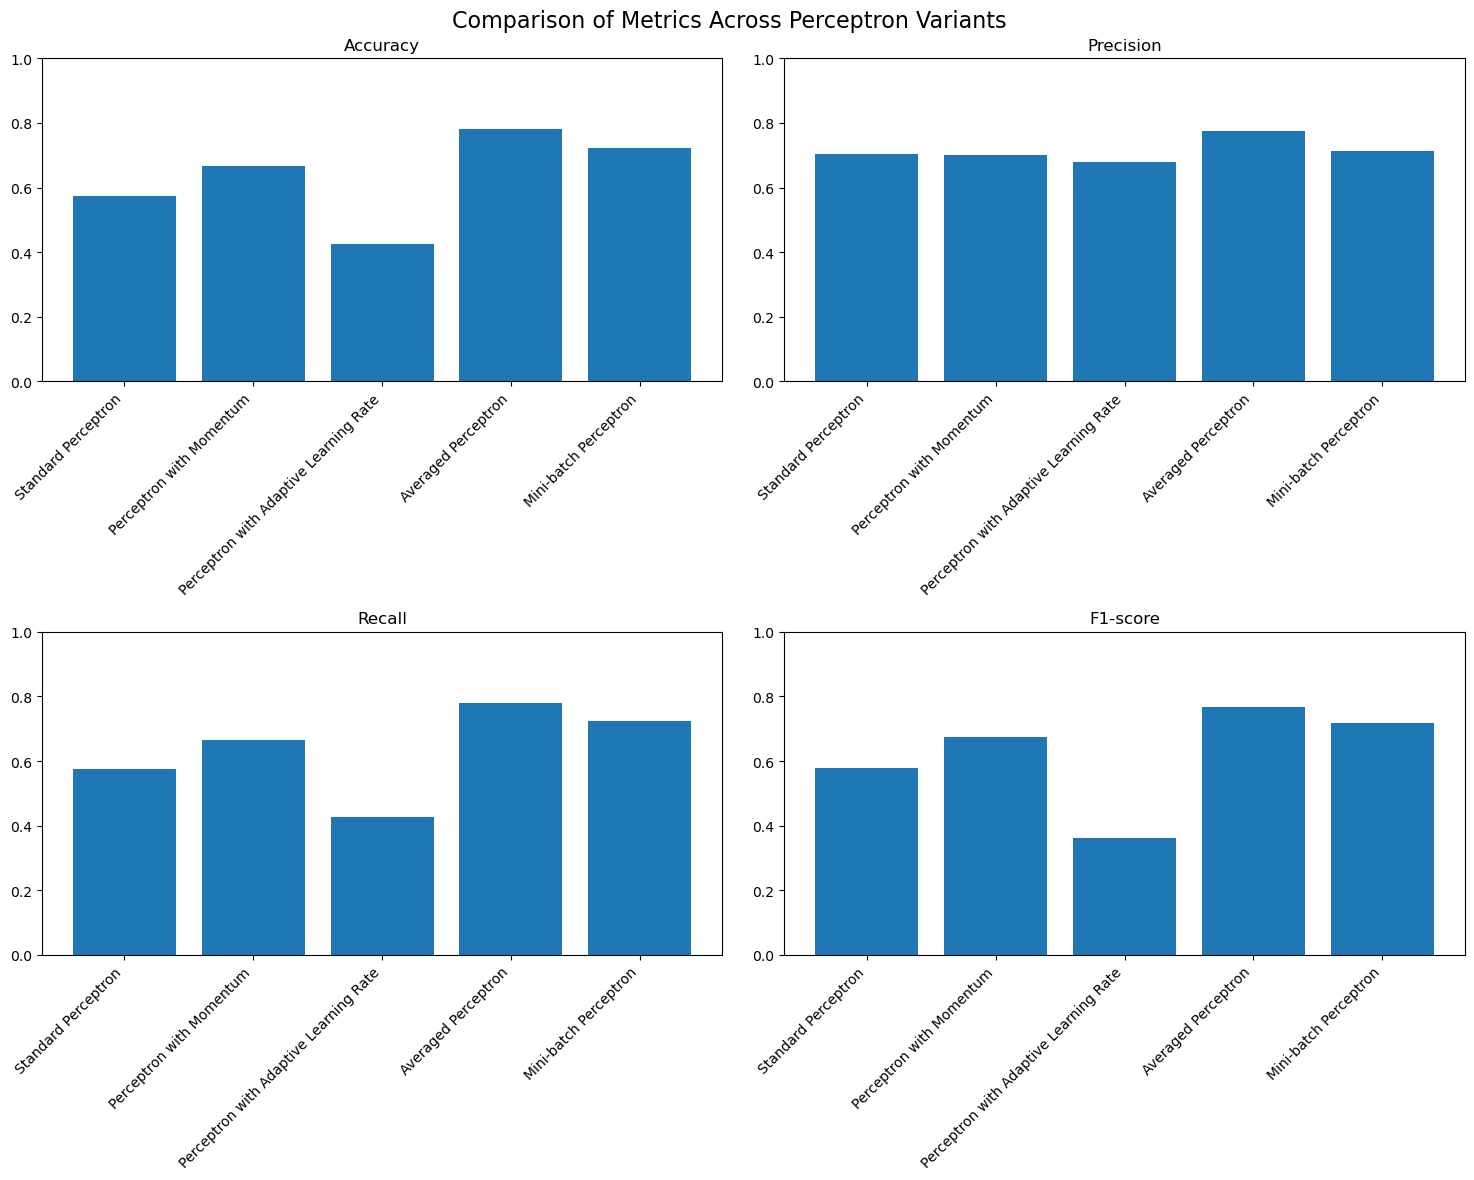

In [29]:
# Plotting comparison of metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle("Comparison of Metrics Across Perceptron Variants", fontsize=16)

for i, metric in enumerate(metrics):
    ax = axes[i // 2, i % 2]
    values = [r[i+1] for r in results]
    ax.bar([r[0] for r in results], values)
    ax.set_title(metric)
    ax.set_ylim(0, 1)
    ax.set_xticklabels([r[0] for r in results], rotation=45, ha='right')

plt.tight_layout()
plt.show()


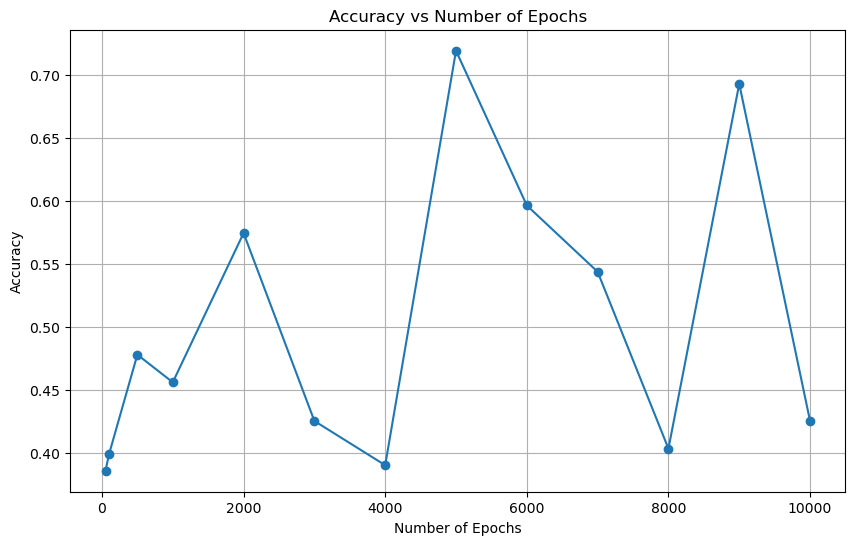

In [24]:
# Experiment with different numbers of epochs
learning_rate = 0.01
num_epochs_list = [50,100,500,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]
accuracy_values = []

for num_epochs in num_epochs_list:
    weights = train_perceptron_standard(X_train.values, y_train.values, learning_rate=learning_rate, num_epochs=num_epochs)
    y_pred = [predict(weights, np.insert(x, 0, 1)) for x in X_test.values]
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(num_epochs_list, accuracy_values, marker='o')
plt.title('Accuracy vs Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

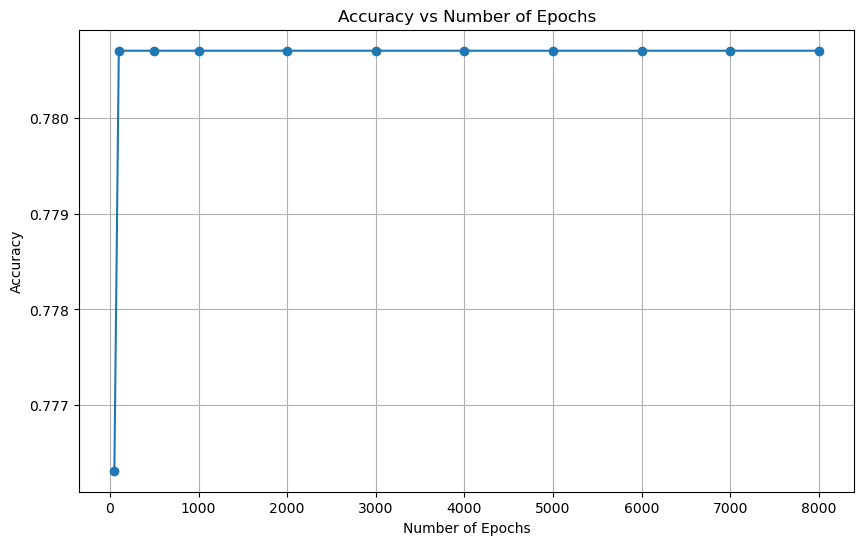

In [33]:
learning_rate = 0.01
accuracy_values = []
num_epochs_list = [50,100,500,1000,2000,3000,4000,5000,6000,7000,8000]

for num_epochs in num_epochs_list:
    weights = train_perceptron_averaged(X_train.values, y_train.values, learning_rate=learning_rate, num_epochs=num_epochs)
    y_pred = [predict(weights, np.insert(x, 0, 1)) for x in X_test.values]
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(num_epochs_list, accuracy_values, marker='o')
plt.title('Accuracy vs Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

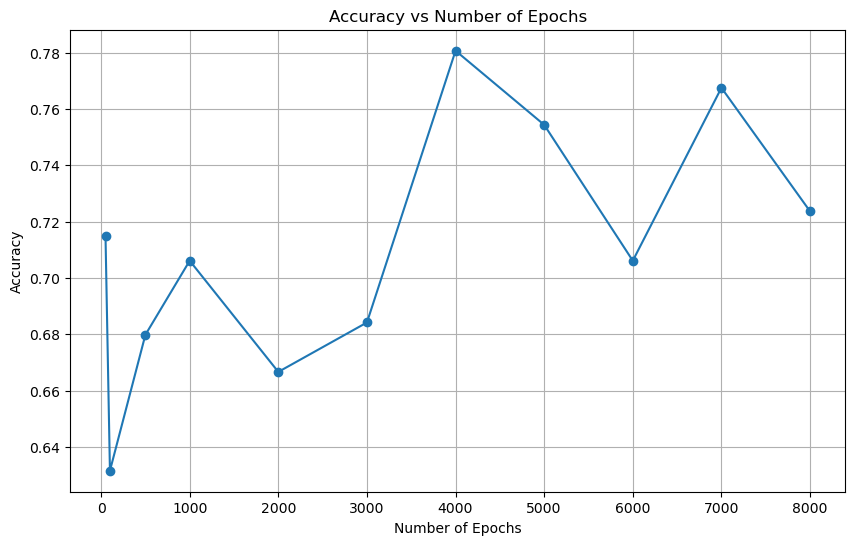

In [32]:
learning_rate = 0.01
accuracy_values = []
num_epochs_list = [50,100,500,1000,2000,3000,4000,5000,6000,7000,8000]

for num_epochs in num_epochs_list:
    weights = train_perceptron_momentum(X_train.values, y_train.values, learning_rate=learning_rate, num_epochs=num_epochs)
    y_pred = [predict(weights, np.insert(x, 0, 1)) for x in X_test.values]
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(num_epochs_list, accuracy_values, marker='o')
plt.title('Accuracy vs Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

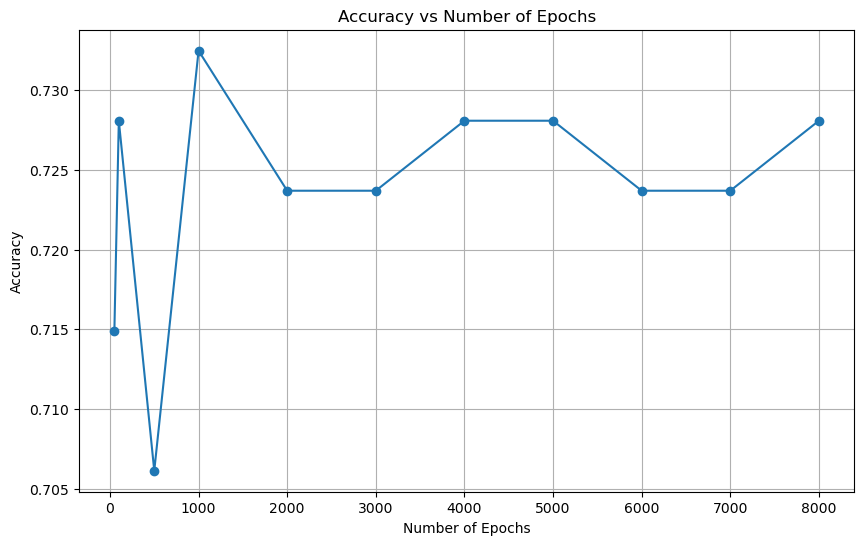

In [34]:
learning_rate = 0.01
accuracy_values = []
num_epochs_list = [50,100,500,1000,2000,3000,4000,5000,6000,7000,8000]

for num_epochs in num_epochs_list:
    weights = train_perceptron_minibatch(X_train.values, y_train.values, learning_rate=learning_rate, num_epochs=num_epochs)
    y_pred = [predict(weights, np.insert(x, 0, 1)) for x in X_test.values]
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(num_epochs_list, accuracy_values, marker='o')
plt.title('Accuracy vs Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

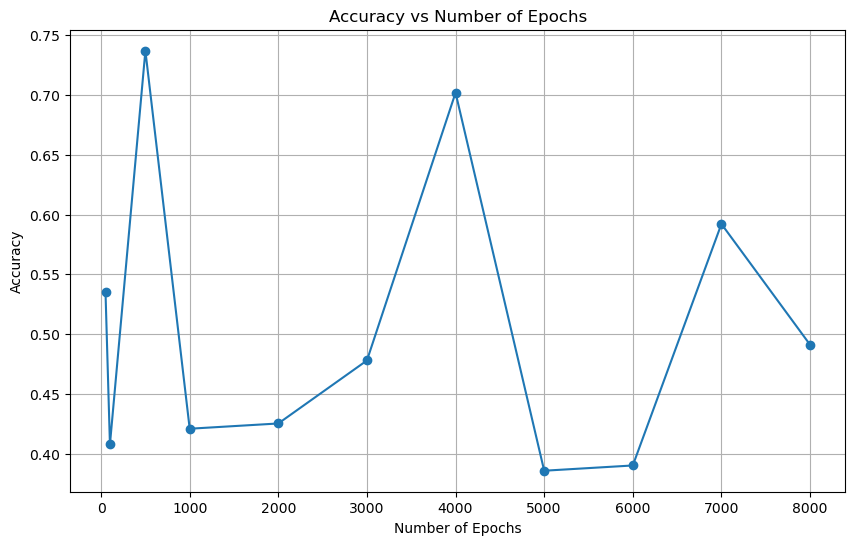

In [42]:
learning_rate = 0.01
# num_epochs_list = [50,100,500,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]
accuracy_values = []
num_epochs_list = [50,100,500,1000,2000,3000,4000,5000,6000,7000,8000]

for num_epochs in num_epochs_list:
    weights = train_perceptron_adaptive(X_train.values, y_train.values, num_epochs=num_epochs)
    y_pred = [predict(weights, np.insert(x, 0, 1)) for x in X_test.values]
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(num_epochs_list, accuracy_values, marker='o')
plt.title('Accuracy vs Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.ylim = [0,]
plt.grid(True)
plt.show()